In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# credit to zachwill (https://gist.github.com/zachwill/d5190af1a7f455dea45d)
# for the seaborn color palette based on 538 data visualizations
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

In [13]:
df = pd.read_csv('./shots/current_year_shot_data.csv')

In [14]:
df.columns

Index(['Unnamed: 0', 'GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [15]:
relevant_data = df.drop(['Unnamed: 0', 'GRID_TYPE', 'GAME_EVENT_ID', 'PLAYER_ID', 'TEAM_ID', 'EVENT_TYPE'], axis=1)

In [16]:
relevant_data.columns

Index(['GAME_ID', 'PLAYER_NAME', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
      dtype='object')

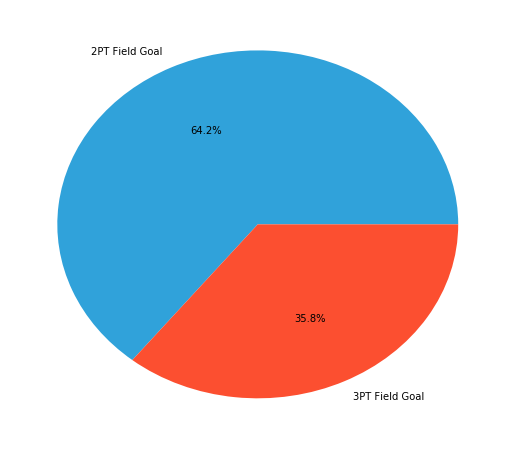

In [17]:
def proportion_of_twos_versus_threes(data):
    grouped_shots = data.groupby("SHOT_TYPE")['SHOT_TYPE']
    plt.figure(figsize=(8,8))
    plt.pie(grouped_shots.count(), labels=data.SHOT_TYPE.unique(), autopct='%1.1f%%')
proportion_of_twos_versus_threes(relevant_data)

In [141]:
league_data.columns

Index(['Rk', 'Season', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%',
       'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'ORtg', 'Year', '2PA'],
      dtype='object')

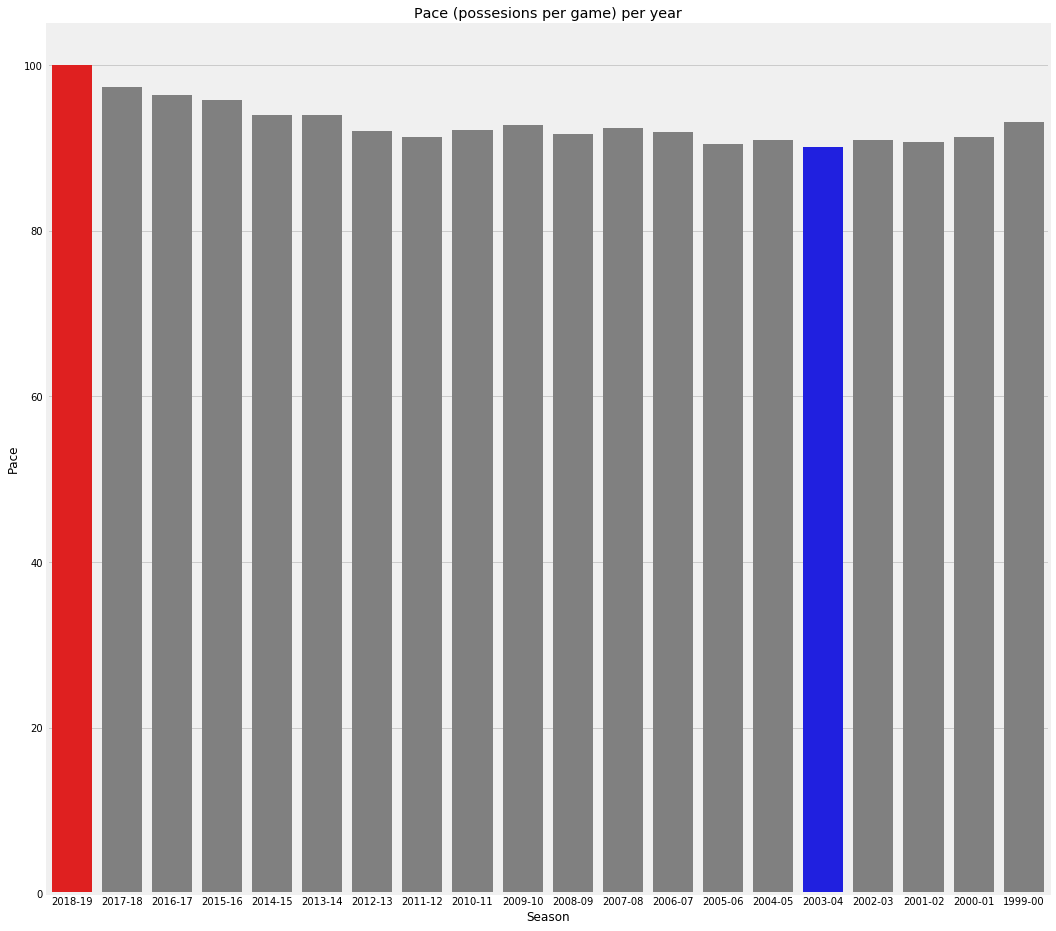

In [94]:
league_data = pd.read_csv('./data/league_averages.csv')
p = league_data.Pace
plt.figure(figsize=(16,16))
plt.title("Pace (possesions per game) per year")
clrs = ['grey' if (x > min(p) and x < max(p)) else 'red' if x == max(p) else 'blue' for x in p]
sns.barplot(x='Season', y='Pace', data=league_data, palette=clrs)

In [91]:
league_data.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg'],
      dtype='object')

In [97]:
league_data = league_data.drop(['Lg', 'Age', 'Ht', 'Wt', 'G'], axis=1)

In [98]:
league_data.head()
league_data['Year'] = league_data['Season']

In [99]:
for i, row in league_data.iterrows():
    res = league_data.at[i, 'Year'].split('-')
    league_data.at[i, 'Year'] = '20' + res[1]

In [100]:
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [133]:
league_data.columns

Index(['Rk', 'Season', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%',
       'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'ORtg', 'Year'],
      dtype='object')

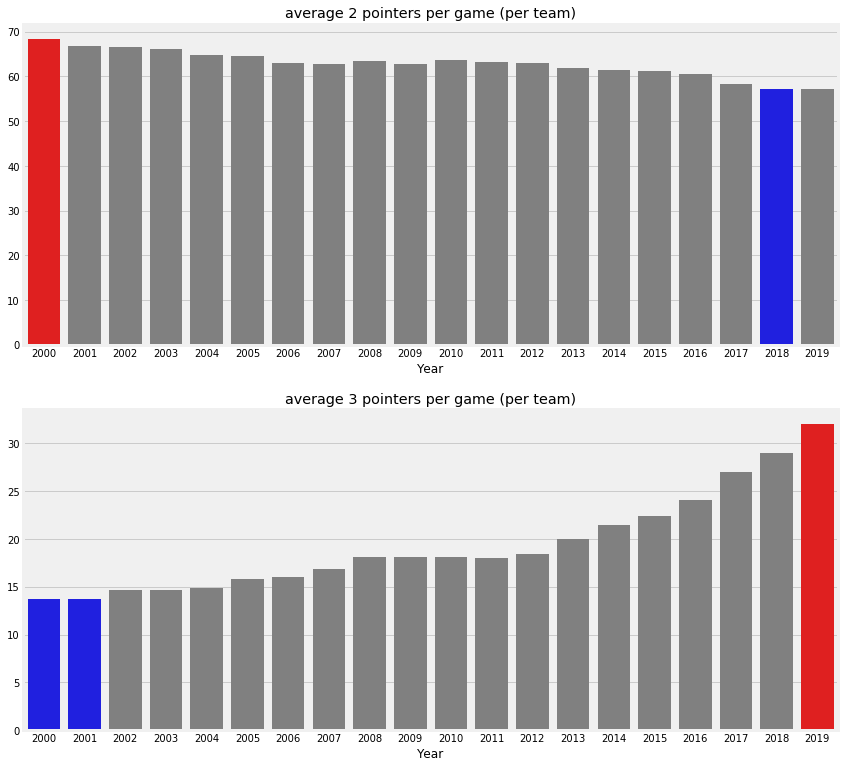

In [140]:
league_data['2PA'] = league_data['FGA'] - league_data['3PA']
def plot_twos_and_threes_teams(league_data):
    fig, [ax1, ax2] = plt.subplots(2, figsize=(13,13))
    ax1.title.set_text("average 2 pointers per game (per team)")
    league_twos = league_data.groupby('Year')['2PA'].mean()
    clrs = ['grey' if (x < max(league_twos) and x > min(league_twos)) else 'blue' if (x == min(league_twos)) else 'red' for x in league_twos]
    sns.barplot(x=league_twos.index, y=league_twos.values, palette=clrs, ax=ax1)

    ax2.title.set_text("average 3 pointers per game (per team)")
    league_threes = league_data.groupby('Year')['3PA'].mean()
    clrs = ['grey' if (x < max(league_threes) and x > min(league_threes)) else 'blue' if (x == min(league_threes)) else 'red' for x in league_threes]
    sns.barplot(x=league_threes.index, y=league_threes.values, palette=clrs, ax=ax2)
    plt.savefig('./plots/twos_and_threes_teams.png')
plot_twos_and_threes_teams(league_data)

In [118]:
player_data = pd.read_csv('./data/player_data.csv')

In [119]:
player_data = player_data.drop(['Rk', 'Unnamed: 0'], axis=1)

In [120]:
player_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,25.9,4.5,10.6,.424,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000.0
1,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,26.2,4.8,11.2,.433,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000.0
2,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,24.9,3.4,8.7,.389,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000.0
3,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,39.3,7.2,15.6,.465,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000.0
4,Cory Alexander,PG,26.0,DEN,29.0,2.0,11.3,1.0,3.4,.286,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000.0


In [128]:
player_data.replace(to_replace = '-', value = np.nan, inplace = True)
player_data['3P%'] = player_data['3P%'].astype(float)
player_data['2P%'] = player_data['2P%'].astype(float)
three_pointers_averages_per_year = player_data.groupby('Year')['3P%'].mean()
two_pointers_averages_per_year = player_data.groupby('Year')['2P%'].mean()

<Figure size 864x864 with 0 Axes>

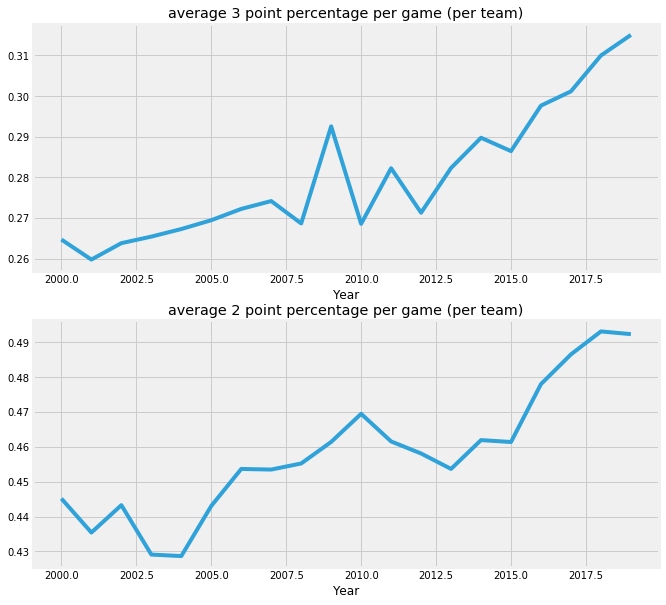

In [131]:
import numpy as np
plt.figure(figsize=(12,12))
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))
ax1.title.set_text("average 3 point percentage per game (per team)")
sns.lineplot(x=three_pointers_averages_per_year.index, y=three_pointers_averages_per_year.values, ax=ax1)
ax2.title.set_text("average 2 point percentage per game (per team)")
sns.lineplot(x=two_pointers_averages_per_year.index, y=two_pointers_averages_per_year.values, ax=ax2)